In [1]:
import torchvision.transforms as transforms
import cv2
import numpy as np
import torch
import torchvision
import argparse
from PIL import Image
from google.colab.patches import cv2_imshow
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
def get_labels(image, model, device):
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image)
    return outputs

In [3]:
def draw_map(outputs):
    labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
    r = np.zeros_like(labels).astype(np.uint8)
    g = np.zeros_like(labels).astype(np.uint8)
    b = np.zeros_like(labels).astype(np.uint8)

    for label_num in range(0, len(label_map)):
        index = labels == label_num
        r[index] = np.array(label_map)[label_num, 0]
        g[index] = np.array(label_map)[label_num, 1]
        b[index] = np.array(label_map)[label_num, 2]

    segmented_image = np.stack([r, g, b], axis=2)
    return segmented_image

In [4]:
def overlay(image, segmented_image):
    alpha = 0.6 # transparent
    beta = 1 - alpha # a + b = 1
    gamma = 0
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    cv2.addWeighted(segmented_image, alpha, image, beta, gamma, image)
    return image

In [5]:

label_map = [
    (0, 0, 0),  # background
    (255, 0, 0),  # aeroplane (red)
    (0, 255, 0),  # bicycle (green)
    (0, 0, 255),  # bird (blue)
    (255, 255, 0),  # boat (yellow)
    (255, 0, 255),  # bottle (magenta)
    (0, 255, 255),  # bus (cyan)
    (128, 0, 0),  # car (maroon)
    (128, 128, 0),  # cat (olive)
    (192, 0, 0),  # chair (dark red)
    (192, 192, 192),  # cow (light gray)
    (0, 192, 0),  # dining table (lime)
    (0, 128, 0),  # dog (green)
    (192, 128, 0),  # horse (orange)
    (0, 0, 128),  # motorbike (navy)
    (128, 0, 128),  # person (purple)
    (128, 128, 128),  # potted plant (gray)
    (0, 64, 0),  # sheep (dark green)
    (128, 64, 0),  # sofa (brown)
    (0, 192, 0),  # train (lime)
    (128, 192, 0),  # tv/monitor (gold)
]


In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# data_transforms = transforms.Compose([transforms.Resize((224,224)),
#                                       transforms.RandomHorizontalFlip(),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [7]:
%%capture
model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval().to(device)

In [8]:
image = Image.open('image1.jpeg')
outputs = get_labels(image, model, device)
outputs = outputs['out']
final_image = draw_map(outputs)

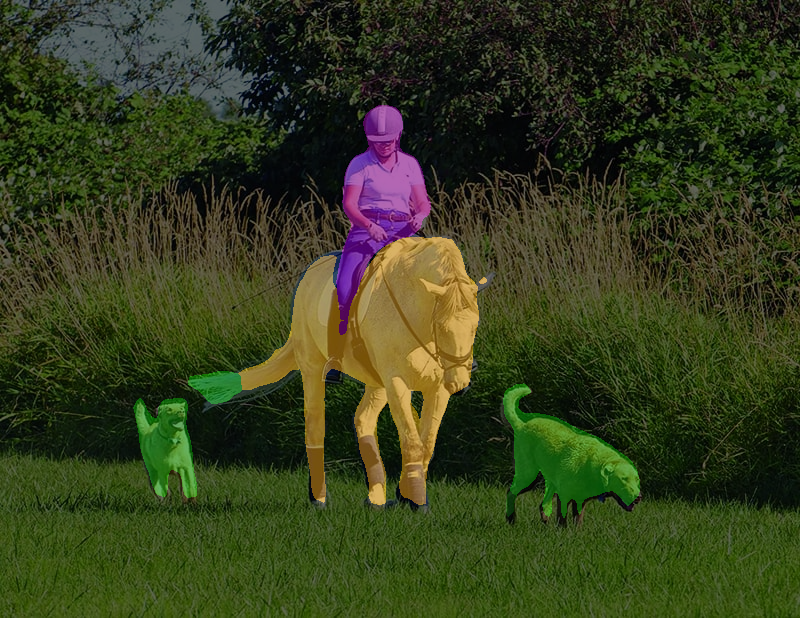

False

In [9]:
segmented_image = overlay(image, final_image)
cv2_imshow(segmented_image)
cv2.imwrite("output/image1_1.jpg", segmented_image)

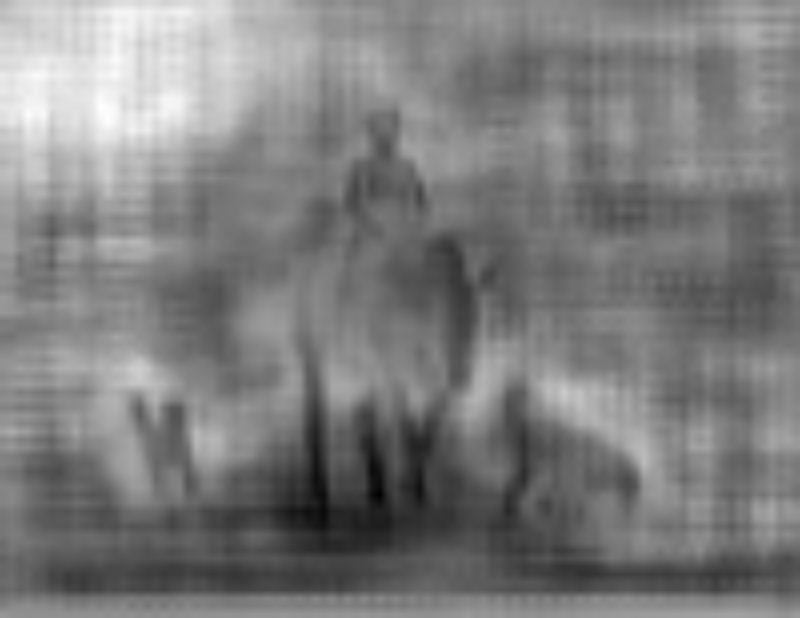

In [10]:
q = 7
# Different q
outputs1 = outputs.detach().cpu().numpy()
output2 = ((outputs1[0][q]-np.min(outputs1[0][q])))
output3 = (output2/np.max(output2))*255
cv2_imshow(output3.astype(np.uint8))

(1, 21, 618, 800)


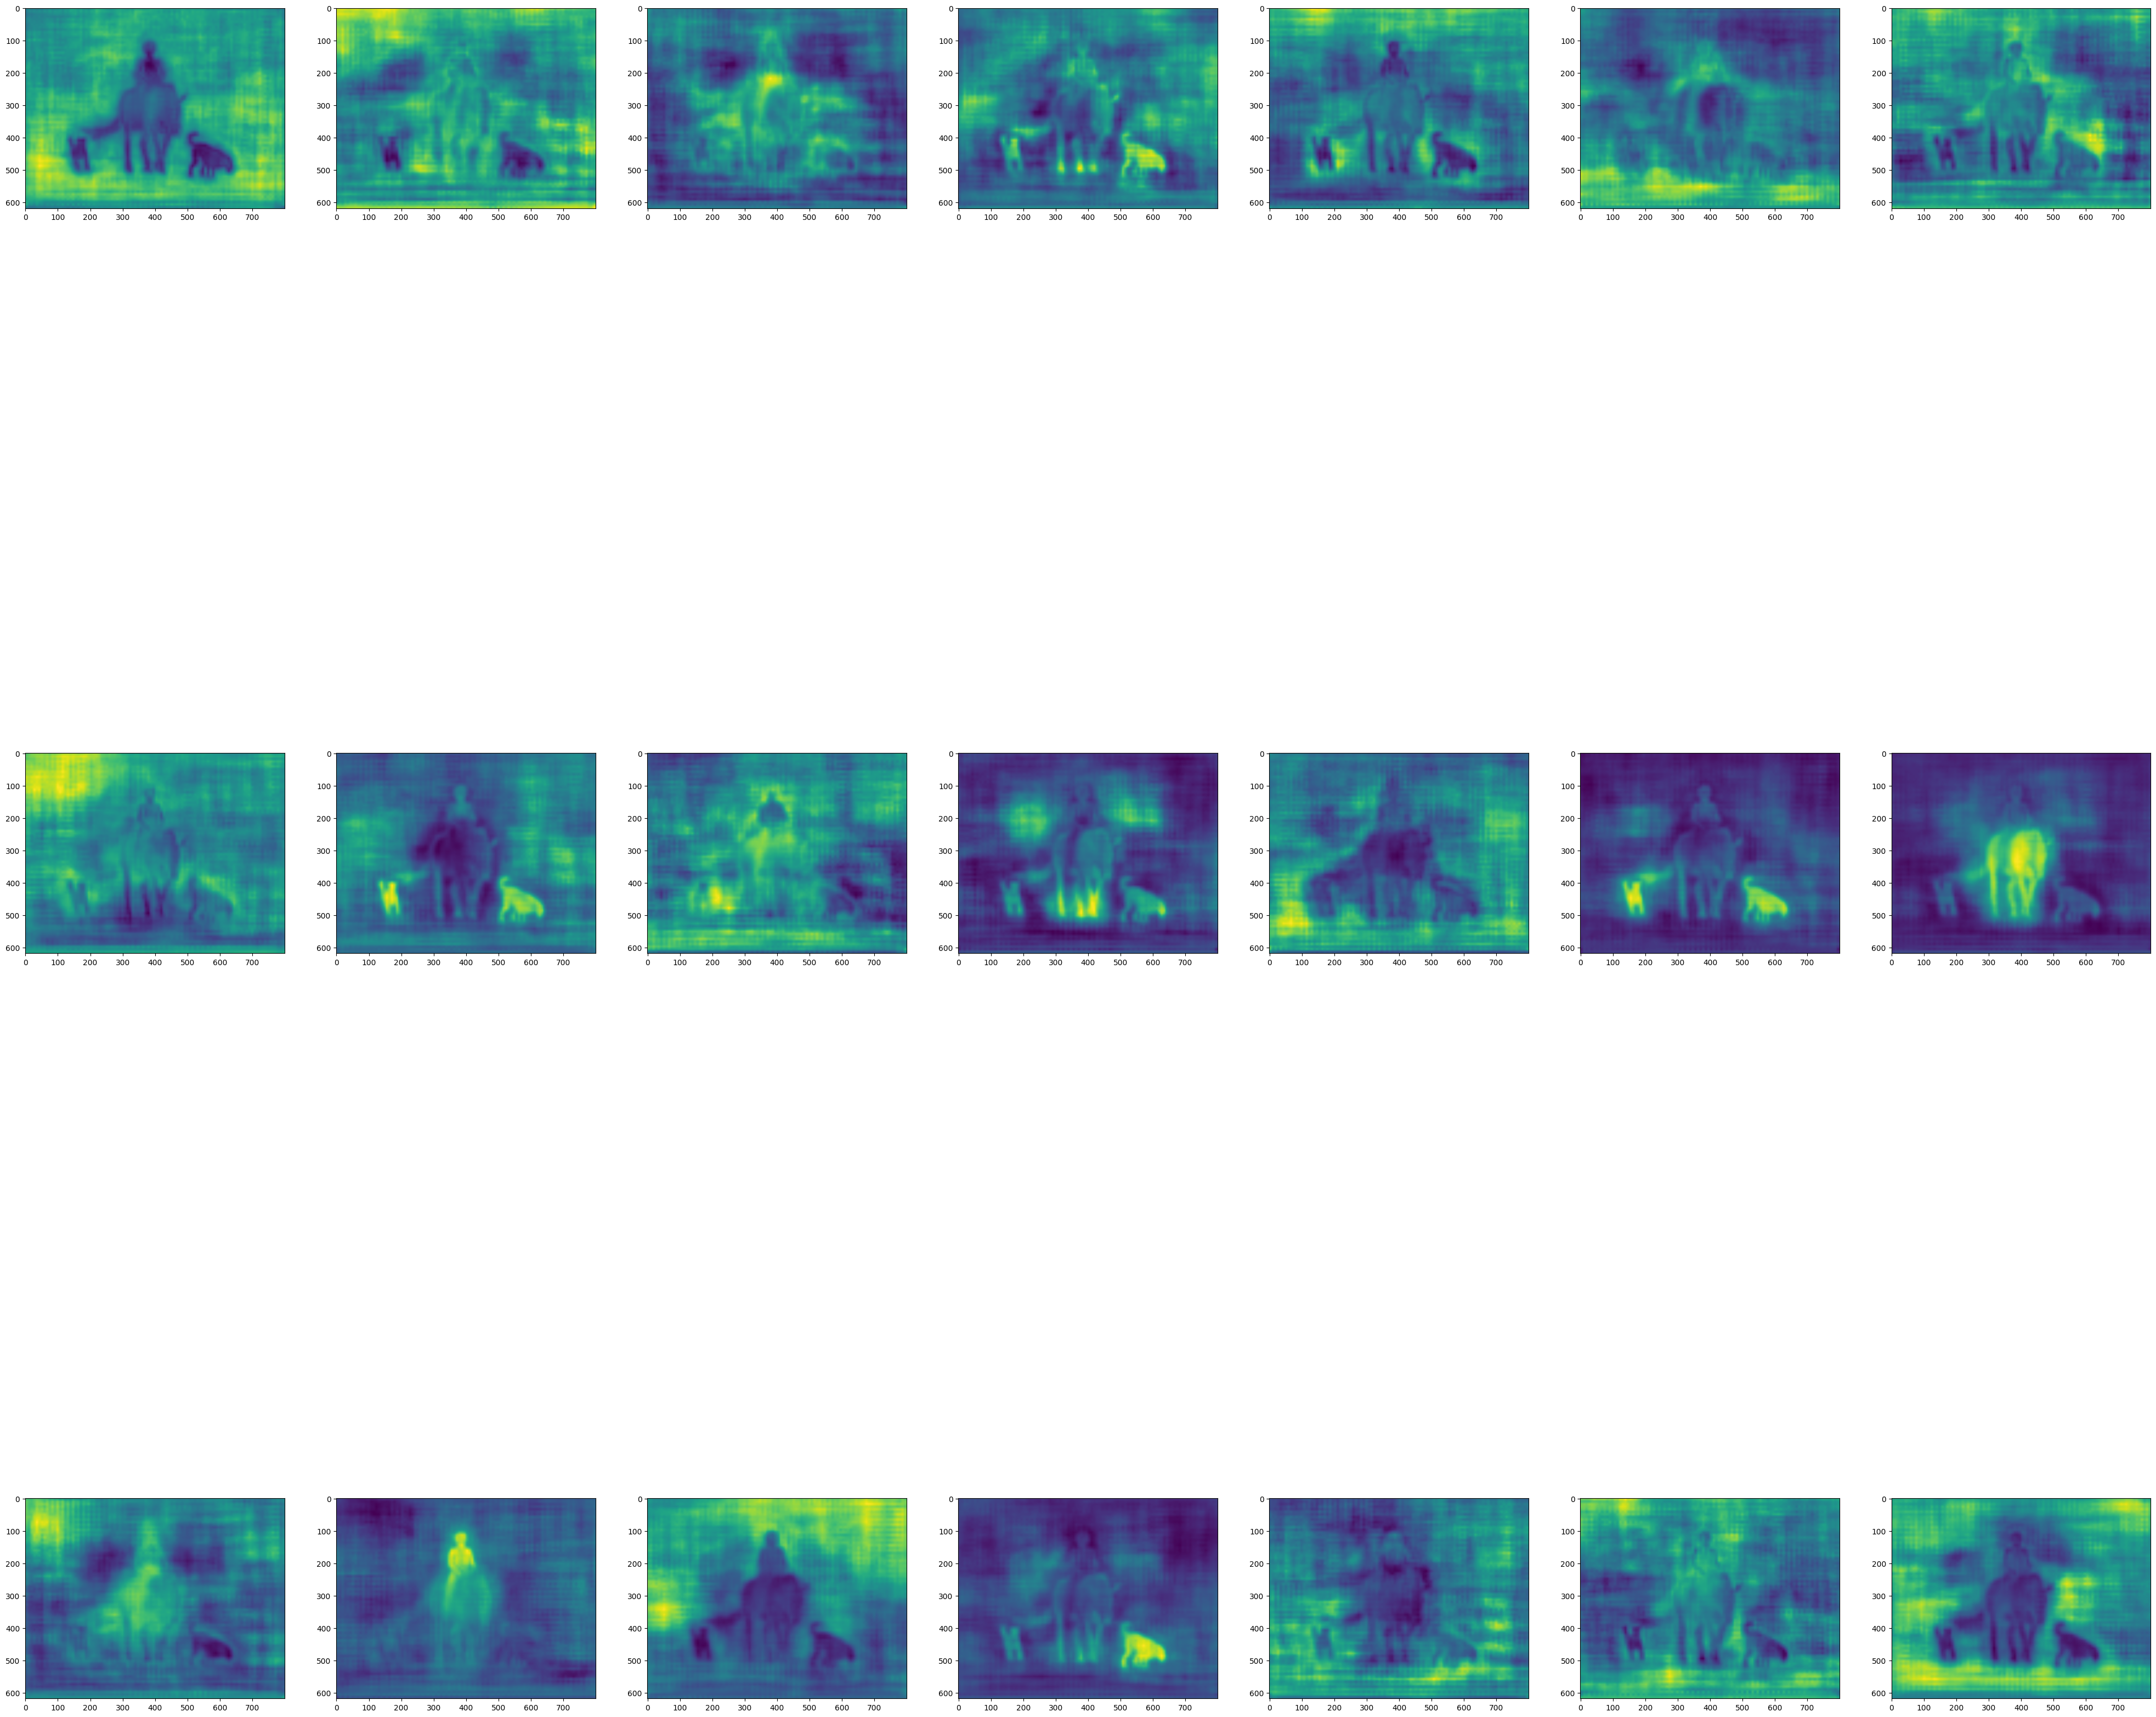

In [11]:
print(outputs1.shape)
outputs1 = outputs.detach().cpu().numpy()
fig=plt.figure(figsize=(50, 50))
# 21 images in 3*7 matrix
columns = 7
rows = 3
for i in range(0, columns*rows):
    output2 = ((outputs1[0][i]-np.min(outputs1[0][i])))
    output3 = (output2/np.max(output2))*255
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(output3)
plt.show()